In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LogNorm 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import pywt
import datetime
from tensorflow.keras.utils import to_categorical
from scipy import signal
from termcolor import colored
from tensorflow.keras.layers import BatchNormalization
%matplotlib inline

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import numpy as np
from keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.models import Model, load_model
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D
from keras.layers import LeakyReLU
from keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras.backend as K
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
X_train = np.array(pd.read_csv('X_train_2.csv'))
y_train = np.array(pd.read_csv('y_train_2.csv'))
X_test = np.array(pd.read_csv('X_test_2.csv'))
y_test = np.array(pd.read_csv('y_test_2.csv'))

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1086037, 28)
(1086037, 1)
(57160, 28)
(57160, 1)


In [5]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [6]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (X_train.shape[0], 1, 28, 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], 1, 28, 1))

In [7]:
print(X_train[0])
print('\n')
print(y_train[0])

[[[5.71428571e-01]
  [7.62081784e-01]
  [7.00000000e-04]
  [9.95000000e-01]
  [9.82526211e-01]
  [0.00000000e+00]
  [7.60000000e-01]
  [2.20000000e-03]
  [0.00000000e+00]
  [1.00000000e+00]
  [1.00000000e+00]
  [6.00000000e-01]
  [2.00000000e-03]
  [0.00000000e+00]
  [1.00000000e+00]
  [5.61797753e-03]
  [2.52928647e-03]
  [2.28658537e-03]
  [2.46913580e-03]
  [5.29100529e-03]
  [2.85364859e-03]
  [4.39560440e-03]
  [0.00000000e+00]
  [7.60456274e-03]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]]


[1. 0.]


In [11]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", padding='same', input_shape=(1, 28, 1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='same'))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(2,activation="softmax"))

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 1, 28, 64)         640       
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 28, 64)         36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 14, 64)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 1, 14, 64)        256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 14, 128)        73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 14, 128)       

In [12]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="Final_Project_CNN_2.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [13]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/500
16970/16970 [==============================] - 91s 5ms/step - loss: 0.5023 - accuracy: 0.7511 - val_loss: 0.4834 - val_accuracy: 0.7669
Epoch 2/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4726 - accuracy: 0.7713 - val_loss: 0.4708 - val_accuracy: 0.7731
Epoch 3/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4618 - accuracy: 0.7776 - val_loss: 0.4817 - val_accuracy: 0.7656
Epoch 4/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4529 - accuracy: 0.7829 - val_loss: 0.4667 - val_accuracy: 0.7760
Epoch 5/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4438 - accuracy: 0.7887 - val_loss: 0.4487 - val_accuracy: 0.7865
Epoch 6/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4369 - accuracy: 0.7927 - val_loss: 0.4345 - val_accuracy: 0.7964
Epoch 7/500
16970/16970 [==============================] - 84s 5ms/step - loss: 0.4328 - accuracy: 0.7952 - val_

In [14]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('Final_Project_CNN_2.h5')

In [15]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[23793  6596]
 [ 4483 22288]]


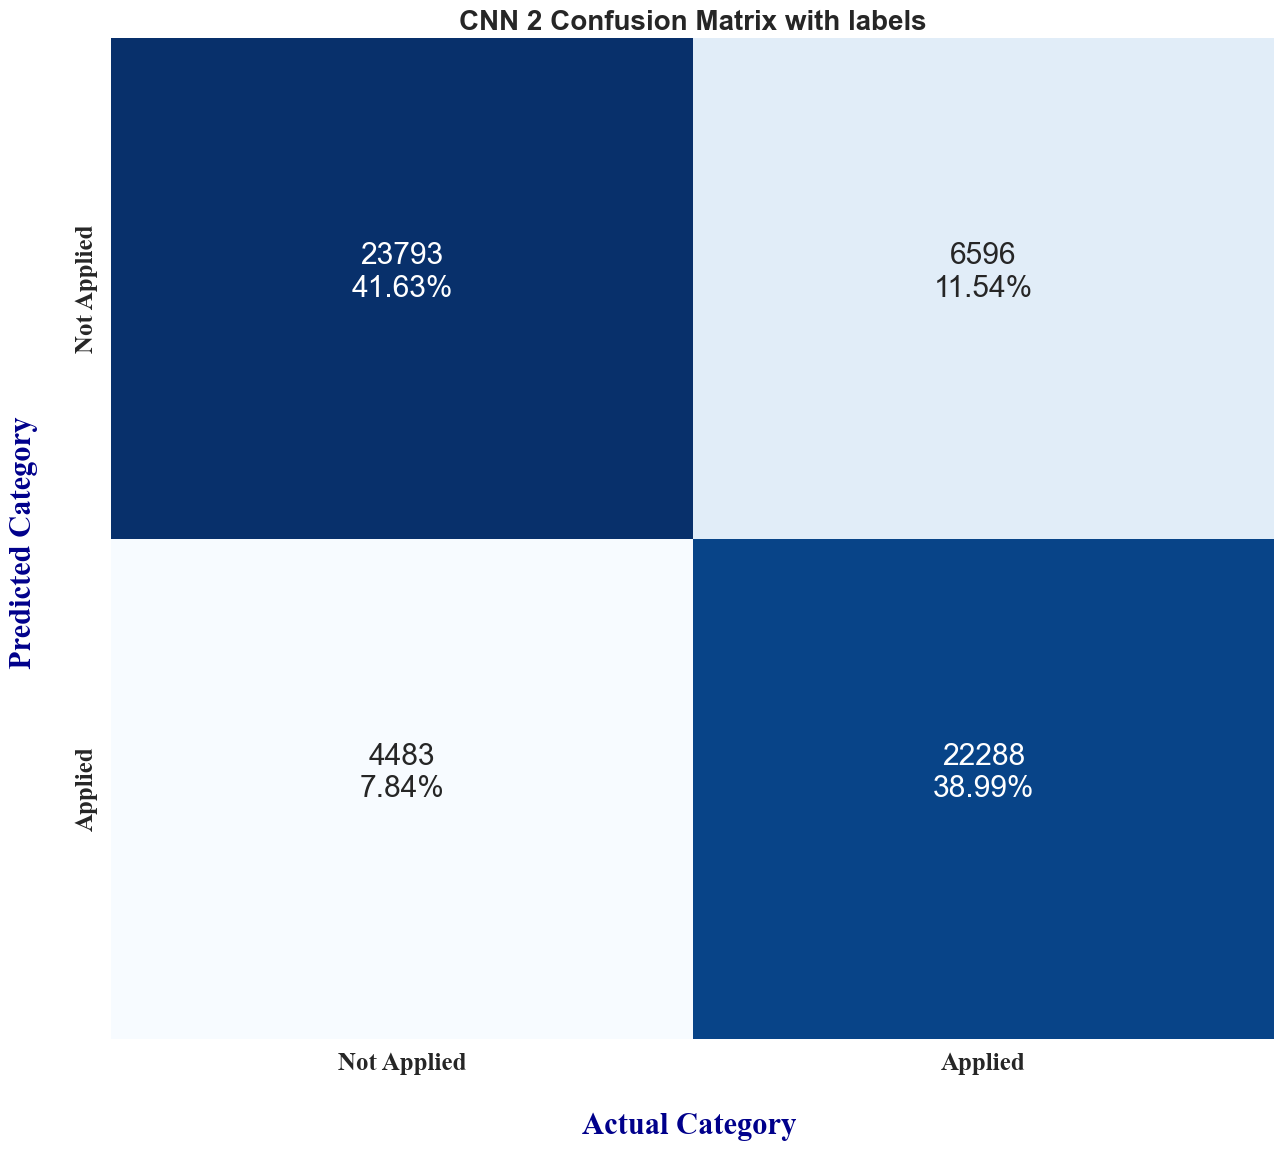

In [19]:
#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(15,13)})
sns.set(font_scale=1.8) #edited as suggested
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)


ax.set_xlabel('\nActual Category ', fontname="Times New Roman", size=22,fontweight="bold")
ax.set_ylabel('Predicted Category \n', fontname="Times New Roman", size=22,fontweight="bold");
#ax.text(0.01, 2.30, 'Fig. 9. (b) Confusion Matrix GRU Binary Class Classification Vehicle 4',fontsize=25,fontweight="bold")

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Not Applied", "Applied"],fontweight="bold", fontname="Times New Roman", size=18)
ax.yaxis.set_ticklabels(["Not Applied", "Applied"],fontweight="bold", fontname="Times New Roman", size=18)
ax.xaxis.label.set_color('darkblue')
ax.yaxis.label.set_color('darkblue')
ax.set_title('CNN 2 Confusion Matrix with labels', fontsize=20,fontweight="bold")
## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
from sklearn.metrics import classification_report
class_names = ["Not Applied", "Applied"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 Not Applied       0.84      0.78      0.81     30389
     Applied       0.77      0.83      0.80     26771

    accuracy                           0.81     57160
   macro avg       0.81      0.81      0.81     57160
weighted avg       0.81      0.81      0.81     57160

